In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm, chi2_contingency, chi2, beta, chisquare
from fitter import Fitter, get_common_distributions, get_distributions
from scipy import stats
from sklearn import preprocessing

In [1]:
df = pd.read_csv('Downloads/insurance_claims.csv')

NameError: name 'pd' is not defined

In [4]:
df.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,2006-10-12,OH,250/500,1000,1351.10,0,478456,...,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,2000-06-04,IN,250/500,1000,1333.35,0,441716,...,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,1990-02-03,IL,100/300,1000,1137.03,0,603195,...,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,1997-02-05,IL,100/300,500,1442.99,0,601734,...,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,2011-07-25,IL,100/300,500,1315.68,0,600983,...,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


count    1000.000000
mean     1256.406150
std       244.167395
min       433.330000
25%      1089.607500
50%      1257.200000
75%      1415.695000
max      2047.590000
Name: policy_annual_premium, dtype: float64

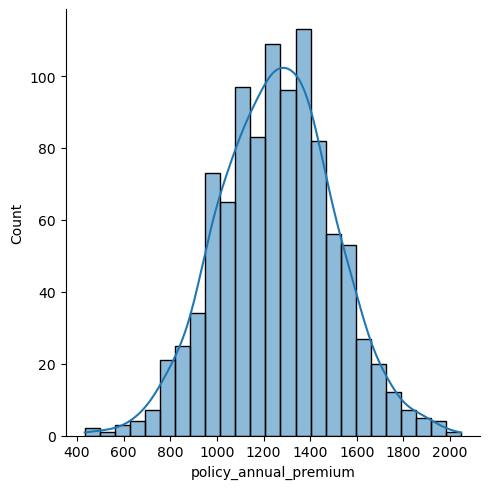

In [12]:
prem = df[df.columns[7]]
sns.displot(prem, kde=True);
prem.describe()

NameError: name 'exp_claims' is not defined

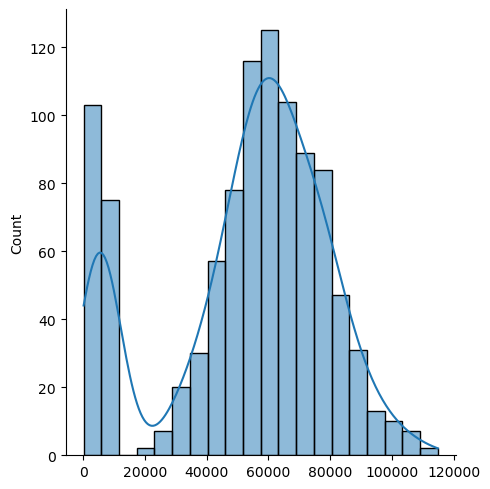

In [5]:
claim_ = df['total_claim_amount'].values
#df['total_claim_amount'].plot.hist(density=True);
sns.displot(claim_, kde=True);
sns.displot(exp_claims, kde=True);

In [107]:
norm.fit(claim_)

(52761.94, 26388.32912172349)

In [ ]:
x = beta.fit(claim_)
x

In [ ]:
exp_claims_ser = pd.Series(exp_claims)

Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████| 5/5 [00:04<00:00,  1.14it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,5.248218e-09,2424.789327,-25945.501512,inf,0.114430,7.302795e-12
burr,5.951828e-09,2395.905026,-25819.691612,inf,0.158882,1.617188e-22
norm,6.114672e-09,2384.916888,-25806.514506,inf,0.127996,9.650274e-15
lognorm,6.207143e-09,2387.466762,-25784.597191,inf,0.130521,2.586263e-15
gamma,6.366234e-09,2383.343671,-25759.289712,inf,0.131377,1.645481e-15


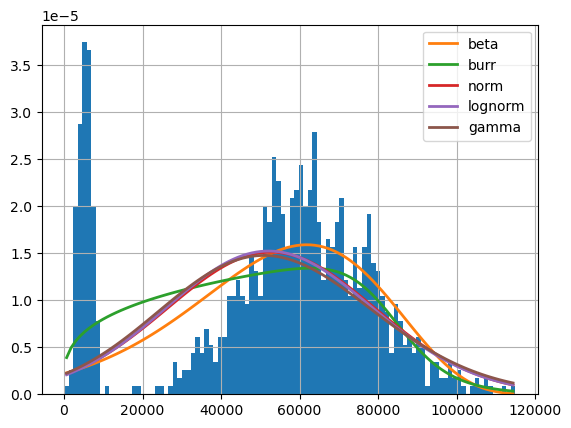

In [9]:
f = Fitter(claim_, distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

In [6]:
f2 = Fitter(claim_)
f2.fit()

Fitting 109 distributions:  88%|███████████████████████████████████████████████▌      | 96/109 [03:33<00:46,  3.57s/it]C:\Users\morara\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 109 distributions:  96%|███████████████████████████████████████████████████  | 105/109 [04:33<00:17,  4.38s/it]C:\Users\morara\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly conv

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
foldcauchy,4.538056e-09,2426.386851,-26097.799099,inf,0.155623,1.287403e-21
genlogistic,4.749873e-09,2434.154427,-26052.179971,inf,0.104695,5.354729e-10
cauchy,4.805181e-09,2452.966578,-26047.510806,inf,0.096078,1.739792e-08
genhyperbolic,4.879361e-09,2432.889723,-26011.468089,inf,0.107876,1.372716e-10
norminvgauss,4.895140e-09,2433.884288,-26015.147236,inf,0.108756,9.355833e-11


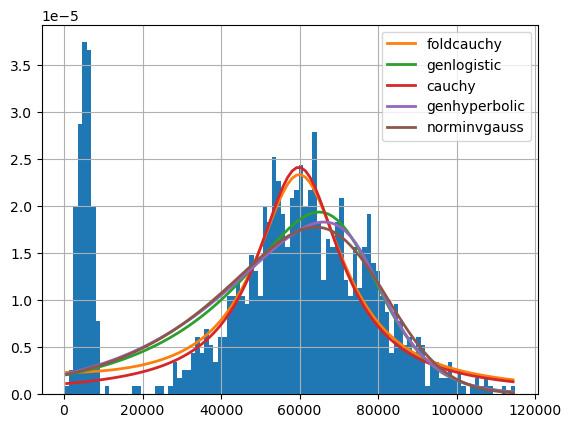

In [18]:
f2.summary()

In [8]:
f.get_best()

NameError: name 'f' is not defined

In [19]:
f2.get_best()

{'foldcauchy': {'c': 4.339524048417111,
  'loc': 99.98668924872649,
  'scale': 13791.06049299222}}

In [168]:
data2 = stats.foldcauchy.rvs(c=4.339524048417111, loc=99.98668924872649, scale=13791.06049299222, size=1000)
df_data2 = pd.Series(data2)

In [169]:
norm_data2 = df_data2/sum(df_data2)
observed_data2 = claim_
norm_data2_exp = norm_data2*sum(observed_data2)

In [170]:
c, p =chisquare(observed_data2, norm_data2_exp)
print(p)
print(c)

0.0
167468557.1652606


In [173]:
claim_[1]

5070

In [171]:
data2[0]

57273.809572213104

In [174]:
# lst_w = []
w = 0
for i in range(len(data2)):
    w += 120_000+1256.406150-abs(data2[i])
    lst_w.append(w)
    if w<0:
        print(f'ruin has occurred at time {i, w}')
        
df_ruin = pd.Series(lst_w)

ruin has occurred at time (83, -3839658.7662293697)
ruin has occurred at time (84, -3785764.6148013617)
ruin has occurred at time (85, -3737920.5641299635)
ruin has occurred at time (86, -3670270.829893807)
ruin has occurred at time (87, -3607132.511777508)
ruin has occurred at time (88, -3546620.448390553)
ruin has occurred at time (89, -3901673.607918037)
ruin has occurred at time (90, -3841942.034331173)
ruin has occurred at time (91, -3771652.5869403463)
ruin has occurred at time (92, -3737411.6704499614)
ruin has occurred at time (93, -3693867.4515070943)
ruin has occurred at time (94, -3632471.1899864525)
ruin has occurred at time (95, -3559233.034310625)
ruin has occurred at time (96, -3503989.2134057204)
ruin has occurred at time (97, -3429888.424030748)
ruin has occurred at time (98, -3353320.8751742058)
ruin has occurred at time (99, -3253216.1454084506)
ruin has occurred at time (100, -3263361.8830388365)
ruin has occurred at time (101, -3190327.2293438506)
ruin has occurred

In [175]:
#sns.displot(df_ruin, kde=True)

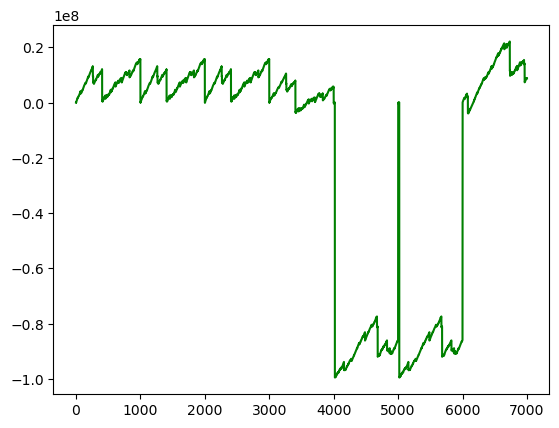

In [176]:
df_ruin.plot(color='green');

In [21]:
observed = np.array([20., 20., 0., 0.])
expected = np.array([.25, .25, .25, .25]) * np.sum(observed)
expected

array([10., 10., 10., 10.])

In [134]:
chisquare(observed, expected)

Power_divergenceResult(statistic=40.0, pvalue=1.065509033425585e-08)